In [38]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df=pd.read_csv("WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
print(df.columns)
print(df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')
(1143, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [7]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

**Note:** One must note that there are a total of 6 diffeerent qualities of wine.

In [8]:
df.duplicated().sum()

0

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

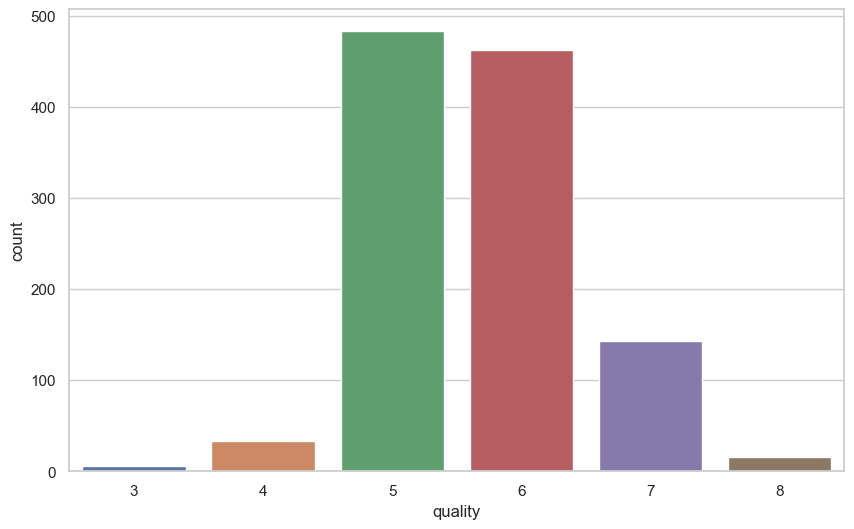

In [39]:
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot(x='quality', data=df)

<Axes: >

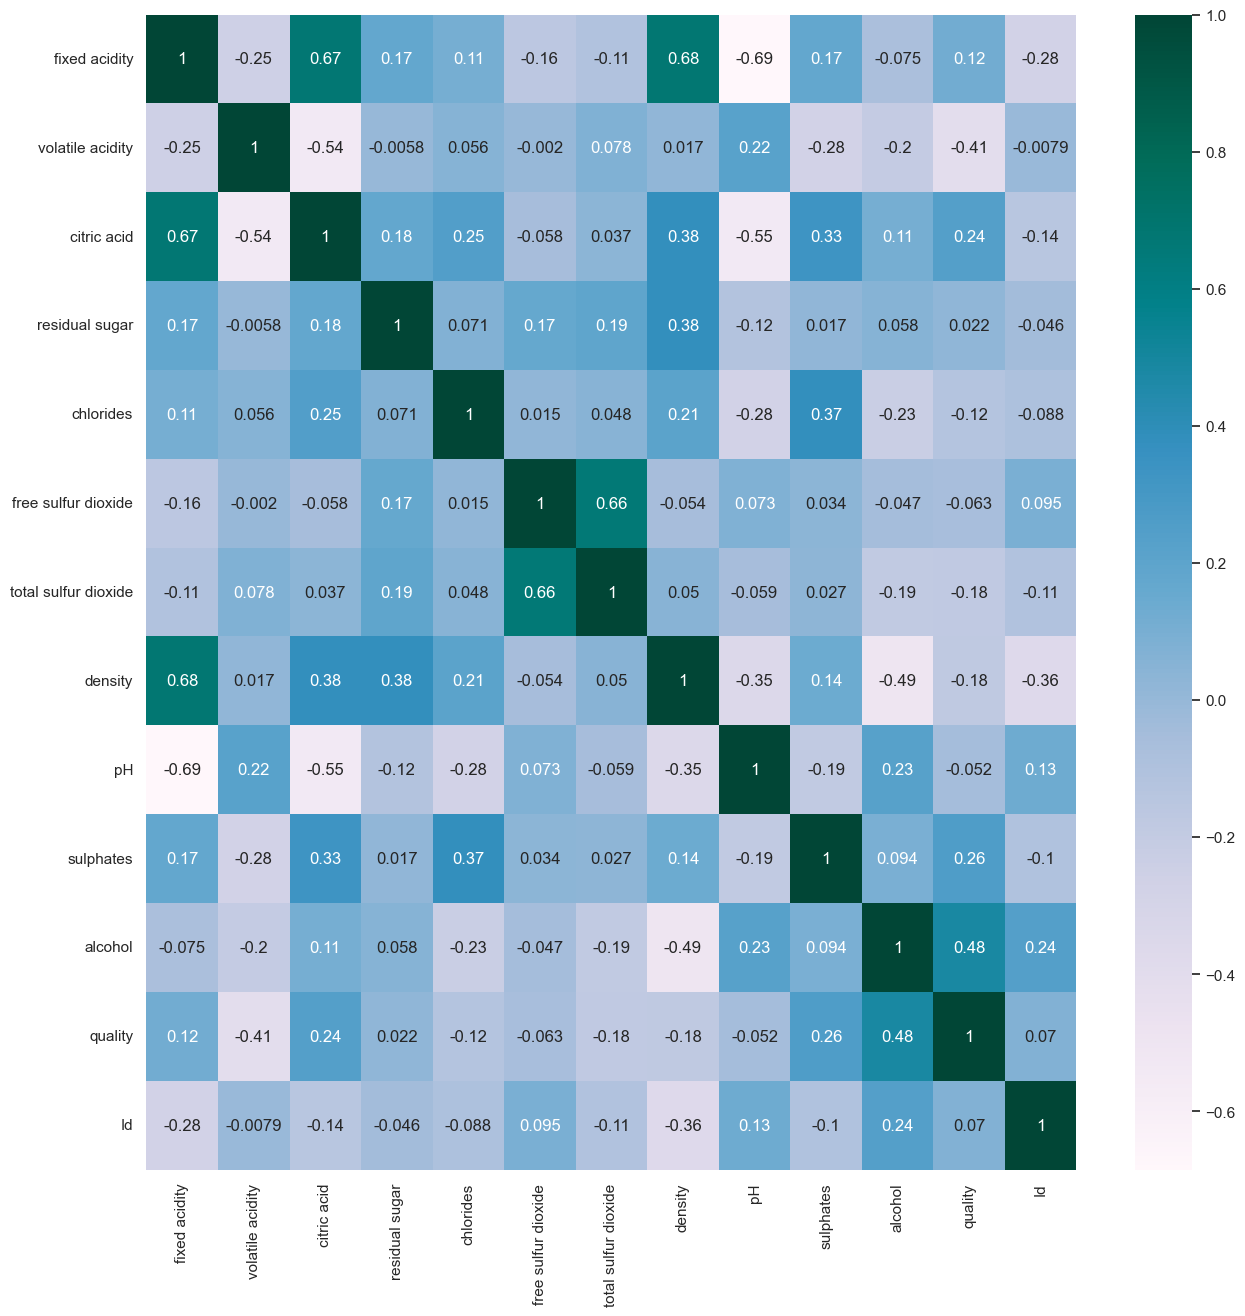

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap= 'PuBuGn')

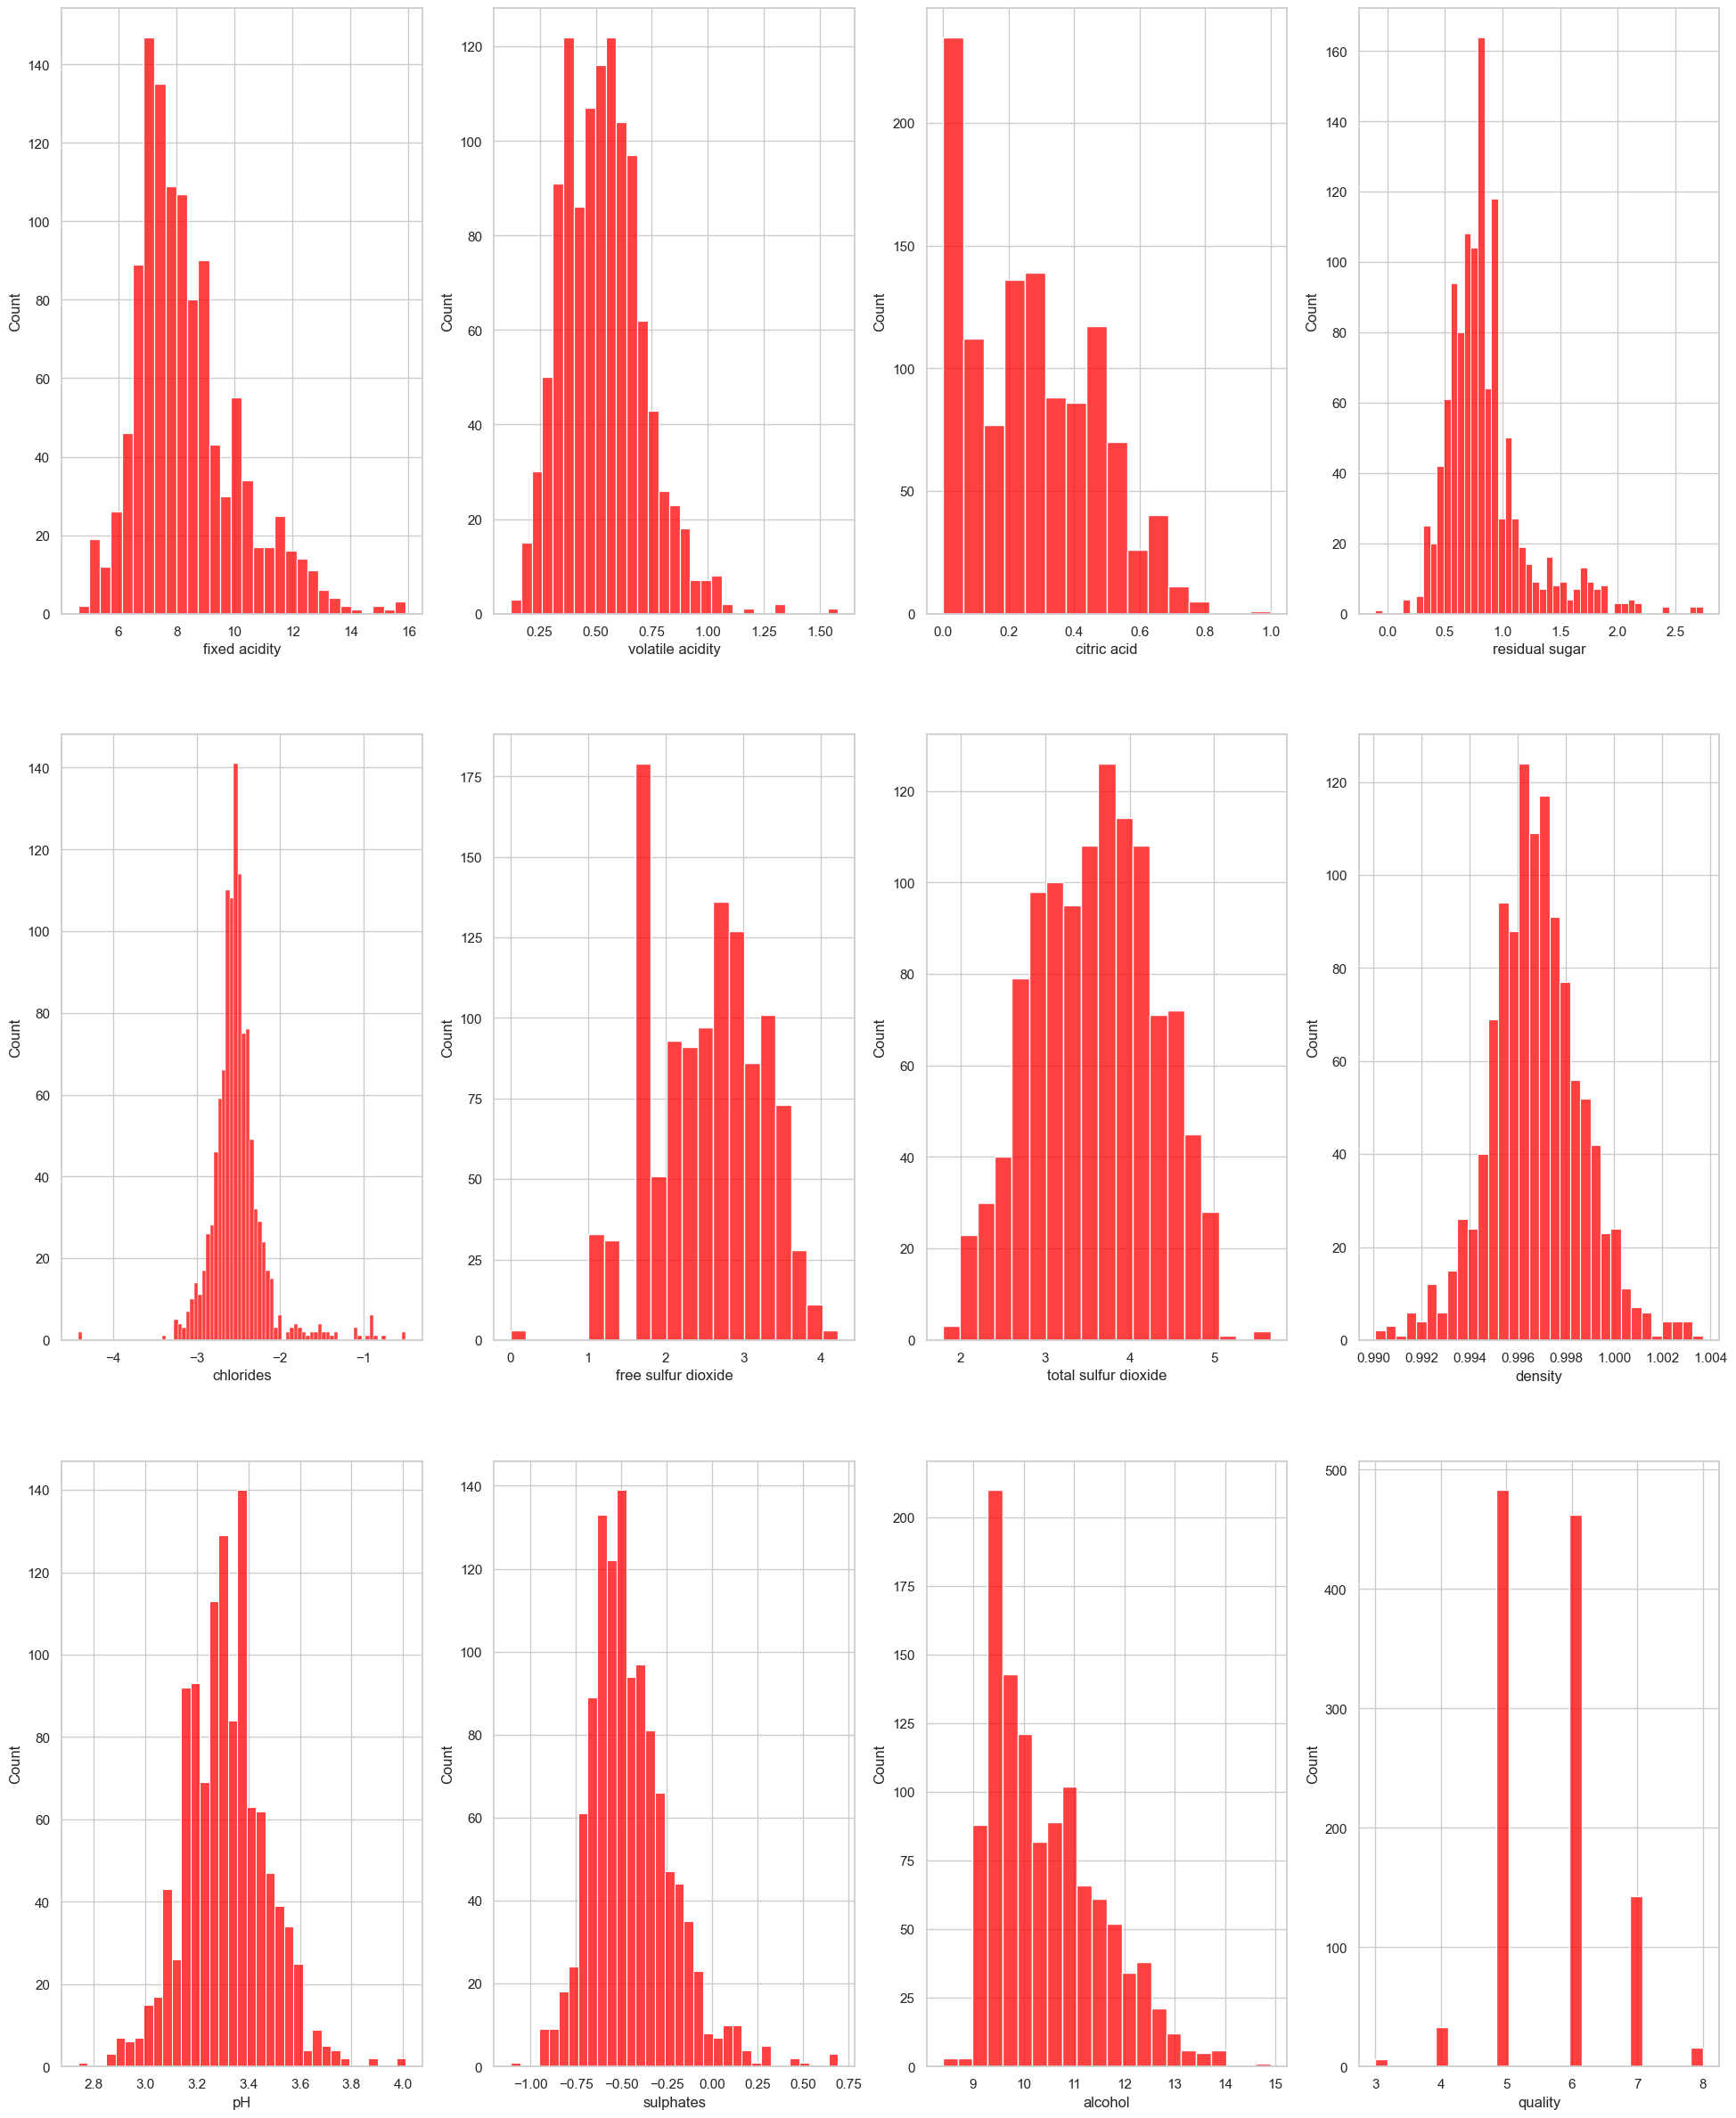

In [40]:
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.histplot(df[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

In [16]:
# Applying logarithmic transform to Residual Sugar, Chlorides and other columns as they are highly skewed towards right

def log_transform(col):
    return np.log(col[0])

df['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)

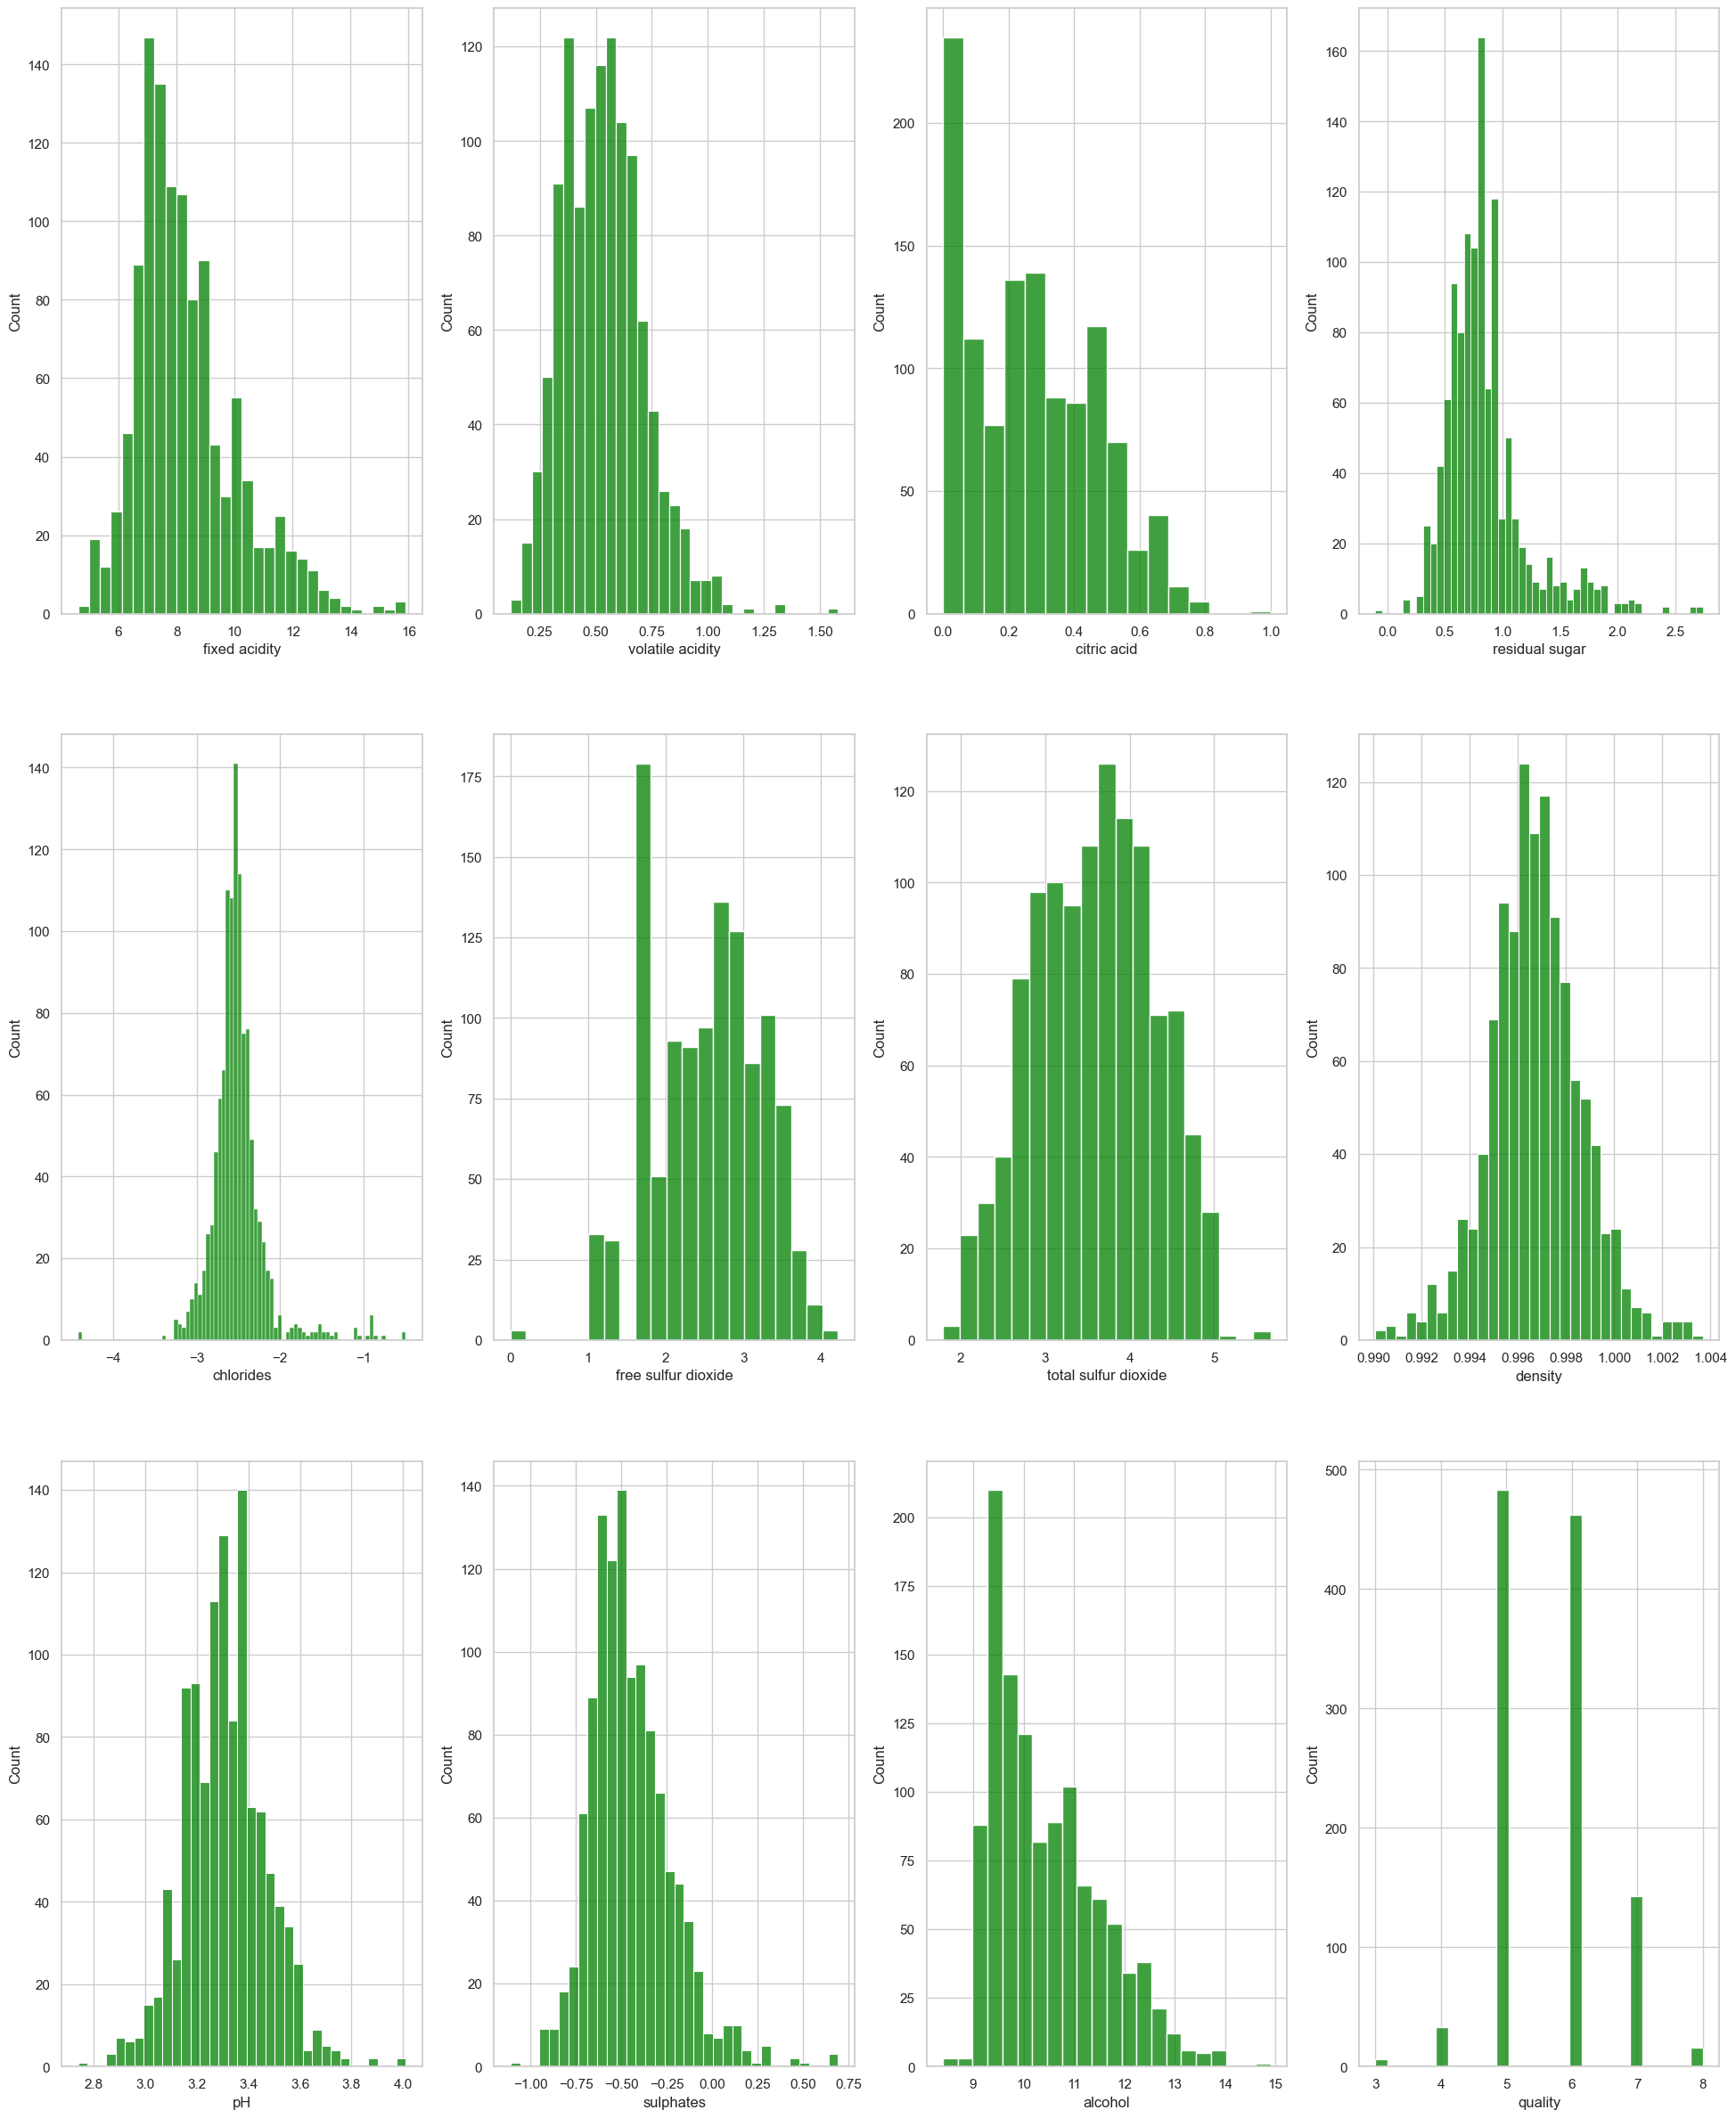

In [19]:
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.histplot(df[columns[k]], ax = ax1[i][j], color = 'green')
            k += 1
plt.show()

In [20]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.315097
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.031487
pH                     -0.052453
free sulfur dioxide    -0.054185
total sulfur dioxide   -0.170128
density                -0.175208
chlorides              -0.175391
volatile acidity       -0.407394
Name: quality, dtype: float64

In [21]:
# The number of ratings for wine quality '5' and '6' are more than 10 times of that of '3' , '4' and '8'. 
# If we leave it as it is, it might create some problem  for us in predicting the quality of the wine. 
# Alternatively, we can also undersample the category '5' and '6' and oversample the remaining ones.

df_3 = df[df.quality==3]     # minority class          
df_4 = df[df.quality==4]     # minority class    
df_5 = df[df.quality==5]     # majority class
df_6 = df[df.quality==6]     # majority class
df_7 = df[df.quality==7]     # minority class
df_8 = df[df.quality==8]     # minority class

#We had already established it earlier that except quality 5 and 6, all the others are minority!

In [23]:
# Oversample minority classes to make balanced data :

from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12) 

# Decreases the rows of Majority one's to make balanced data :
df_5_downsampled = df[df.quality == 5].sample(n=600, replace=True, random_state=12).reset_index(drop=True)
df_6_downsampled = df[df.quality == 6].sample(n=600, replace=True, random_state=12).reset_index(drop=True)



In [24]:
# Combine downsampled majority class with upsampled minority class
balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)


# Display new class counts
balanced_df.quality.value_counts()           


quality
3    600
4    600
7    600
8    600
5    600
6    600
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='alcohol'>

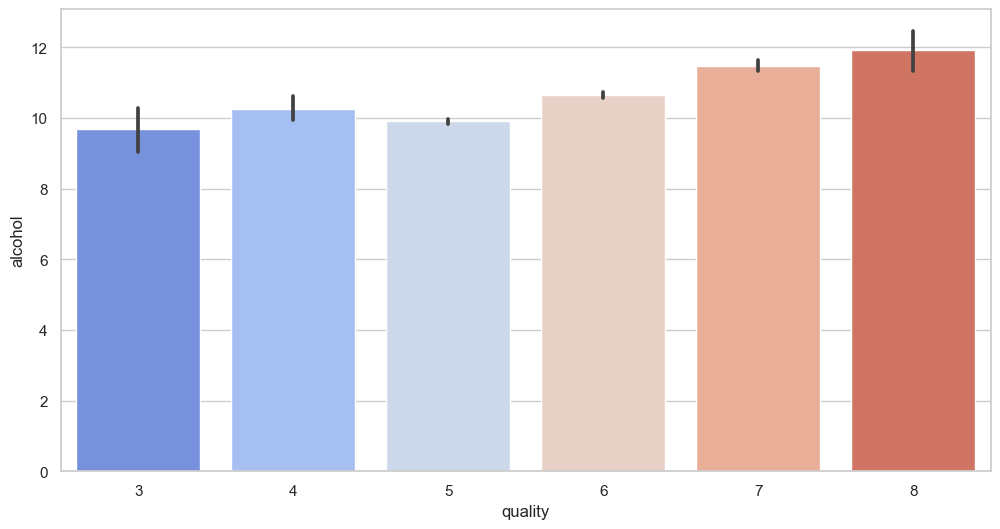

In [26]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'coolwarm')

Text(0, 0.5, 'Features')

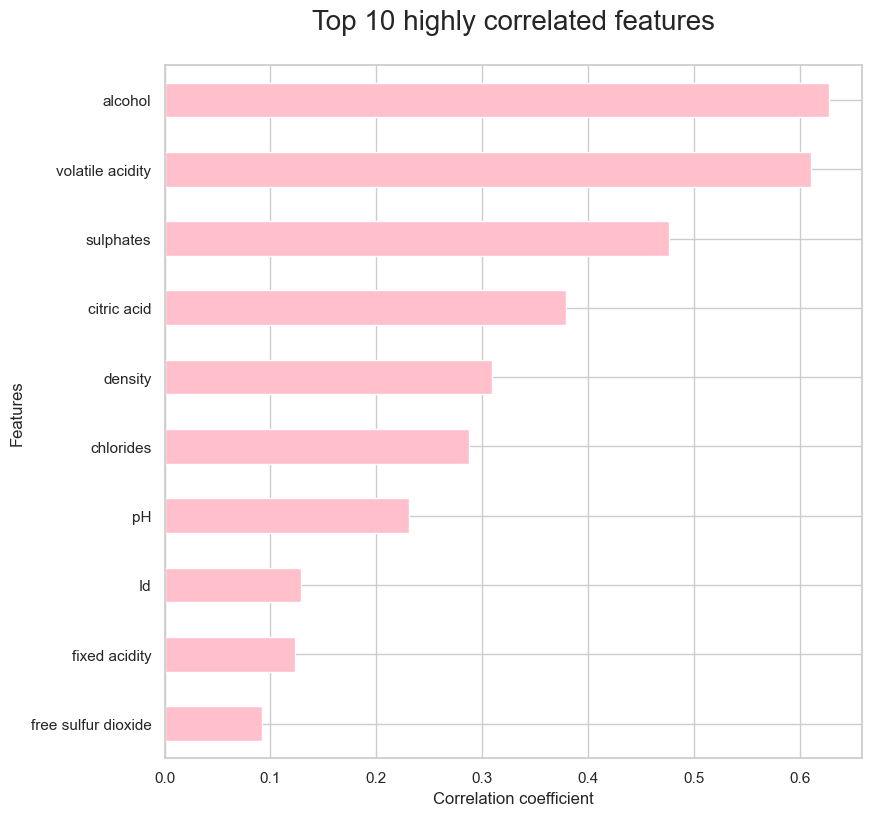

In [28]:
plt.figure(figsize=(9,9))
balanced_df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='pink') 
# calculating the top 10 highest correlated features wrt the target variable "quality".
plt.title("Top 10 Highly Correlated features", size=20, pad=26)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")

In [29]:
# Selecting features for training

selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol']

In [30]:
X = balanced_df[selected_features]
y = balanced_df.quality

In [31]:
from sklearn.model_selection import train_test_split

# Splitting the data into 70% and 30% to construct Training and Testing Data respectively.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=13)

In [32]:
from sklearn.neighbors import KNeighborsClassifier  
# For weights = 'uniform'
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8481481481481481
For n_neighbors =  10  score is  0.7759259259259259
For n_neighbors =  15  score is  0.7305555555555555
For n_neighbors =  20  score is  0.7212962962962963


In [33]:
# For weights = 'distance'
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(X_train, y_train) 
    scr = model.score(X_test, y_test)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.9287037037037037
For n_neighbors =  10  score is  0.924074074074074
For n_neighbors =  15  score is  0.9157407407407407
For n_neighbors =  20  score is  0.9120370370370371


In [34]:
# Creating a k-nearest neighbors Classifier
KNN_Model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the model using the training set
KNN_Model.fit(X_train, y_train) 
results = KNN_Model.fit(X_train, y_train)

In [35]:
# Train Predictions
KNN_train_predictions = KNN_Model.predict(X_train)

In [36]:
# Test Predictions
KNN_test_predictions = KNN_Model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, KNN_train_predictions))

print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, KNN_train_predictions))

print("\n \n Test Data: KNN_Confusion Matrix: \n ")
print(confusion_matrix(y_test, KNN_test_predictions))

print("\n Test Data: KNN_Classification Report:\n ")
print(classification_report(y_test, KNN_test_predictions))


 Train Data: KNN_Confusion Matrix:
 
[[422   0   0   0   0   0]
 [  0 392   0   0   0   0]
 [  0   0 423   0   0   0]
 [  0   0   0 436   0   0]
 [  0   0   0   0 423   0]
 [  0   0   0   0   0 424]]

 Train Data: KNN_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       422
           4       1.00      1.00      1.00       392
           5       1.00      1.00      1.00       423
           6       1.00      1.00      1.00       436
           7       1.00      1.00      1.00       423
           8       1.00      1.00      1.00       424

    accuracy                           1.00      2520
   macro avg       1.00      1.00      1.00      2520
weighted avg       1.00      1.00      1.00      2520


 
 Test Data: KNN_Confusion Matrix: 
 
[[178   0   0   0   0   0]
 [  0 208   0   0   0   0]
 [  0   5 139  26   7   0]
 [  0   5  15 131  13   0]
 [  0   0   5   1 171   0]
 [  0   0   0   0   0 176]]

 Test Dat